In [ ]:
import numpy as np
from tools import *
from fitters import *
from plots import *
from projectors import *
set_seaborn({'figure.figsize': (12,6)})
sns.set_style('white')
plt.rcParams['figure.dpi'] = 150
%load_ext autoreload
%autoreload 2


In [80]:

n_series = 8
series_rank = 3
shape = (n_series, series_rank)

a_s = np.random.randn(*shape)
e_s = np.random.uniform(-2, 2, size=series_rank)


noise = 1e-8
beta = 1e-5
start_end = (-1, 3)
dt = 0.03
dim = 12

offset = True
time = np.arange(start_end[0], start_end[1]+dt, dt)

X0s = []
Xps = []
X_series_s, Y_series_s = [], []

for i in range(n_series):
    X_series, Y_series, _, _ = build_exp_series(
        a_s[i], e_s, noise=noise, time=time)
    if len(X_series_s) > 0:
        shift = X_series_s[-1][-1]-X_series[0]
        X_series += shift
        Y_series += shift
    X_series = X_series[1:]
    Y_series = Y_series[1:]
    X_series_s.append(X_series)
    Y_series_s.append(Y_series)

X_series = np.concatenate(X_series_s)
Y_series = np.concatenate(Y_series_s)

window = dim*2

P_series_nowin, theta_nowin, A, c = eig_companion_Cshift(
    X_series, dim, beta=beta)
P_series_win, theta_win, ws = eig_companion_Cshift_time(
    X_series, dim, beta=beta, return_vals=True, window_size=window)

w, vl, vr = scipy.linalg.eig(A, left=True, right=True)
sortorder = np.argsort(np.abs(w))
thetas = vl[:, sortorder][:, ::-1]
w = w[sortorder][::-1]

# compute lams
max_es = e_s[:n_series].flatten()
lams = np.exp(max_es*dt)
lams = np.sort(lams)[::-1]


No handles with labels found to put in legend.


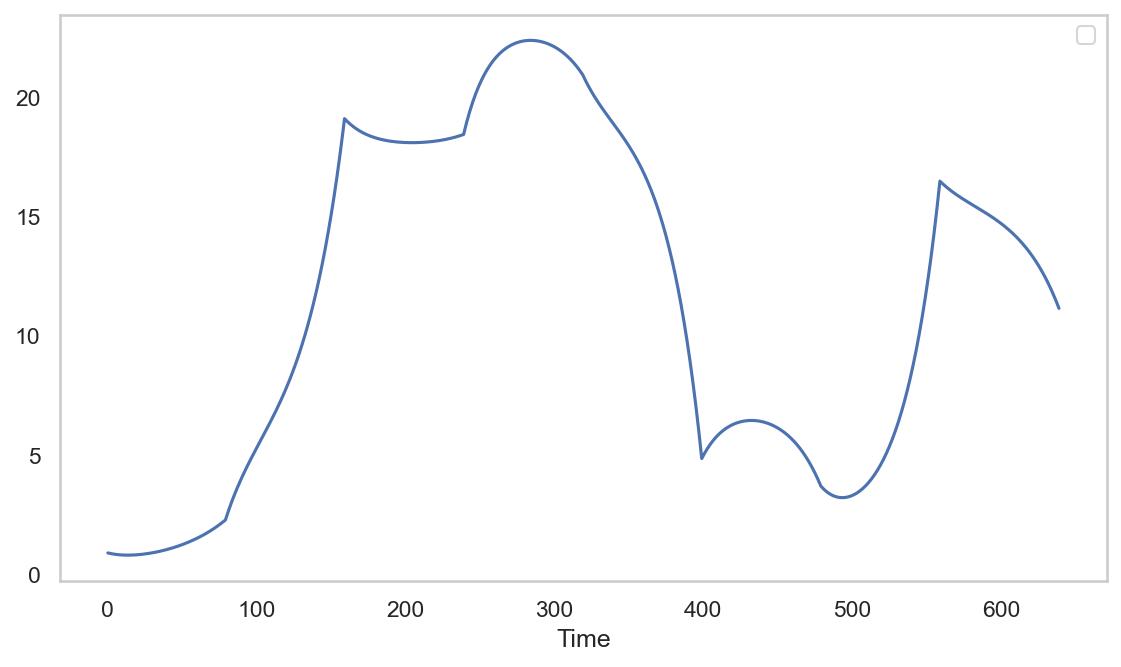

In [81]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9, 5)
ax.plot(X_series)
ax.set_xlabel('Time')
plt.legend()
plt.show()


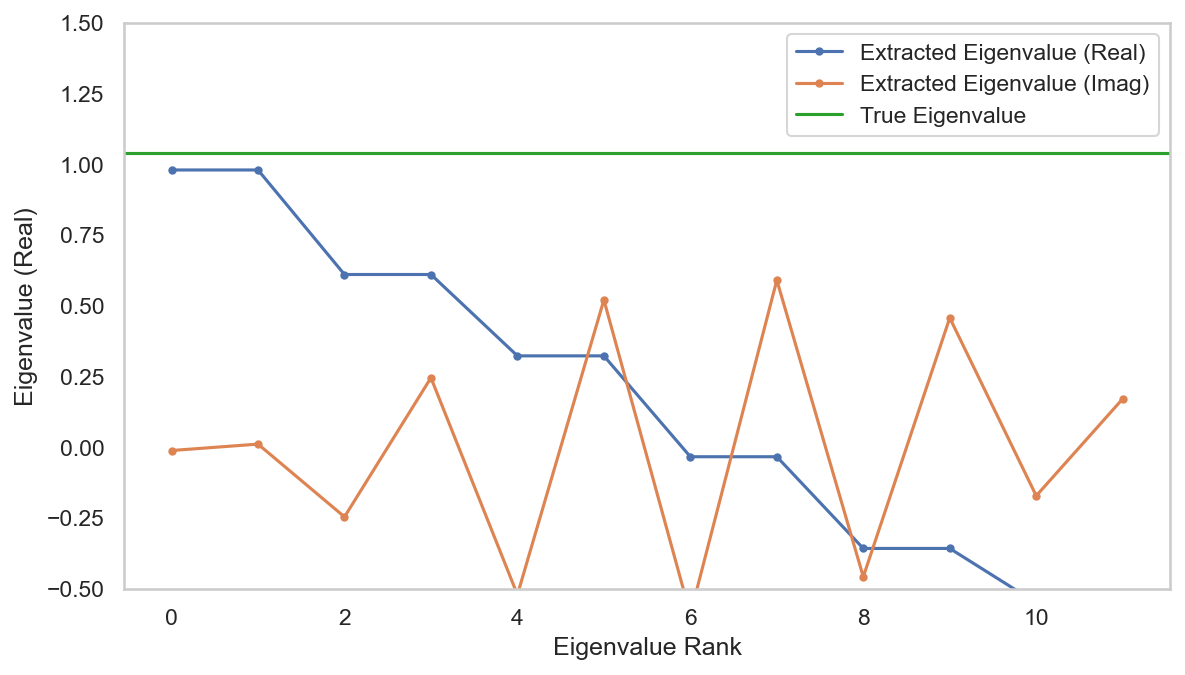

In [84]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9, 5)
ax.set_ylabel('Eigenvalue (Real)')
ax.set_xlabel('Eigenvalue Rank')
ax.plot(w.real, '.-', label='Extracted Eigenvalue (Real)')
ax.plot(w.imag, '.-', label='Extracted Eigenvalue (Imag)')
# plt.scatter(0, lams[0], color='tab:green', label='True Eigenvalue')
ax.axhline(lams[0], color='tab:green', label='True Eigenvalue')
# ax.set_xlim(0, len(w)-1)
ax.set_ylim(-0.5,1.5)
plt.legend()
plt.show()


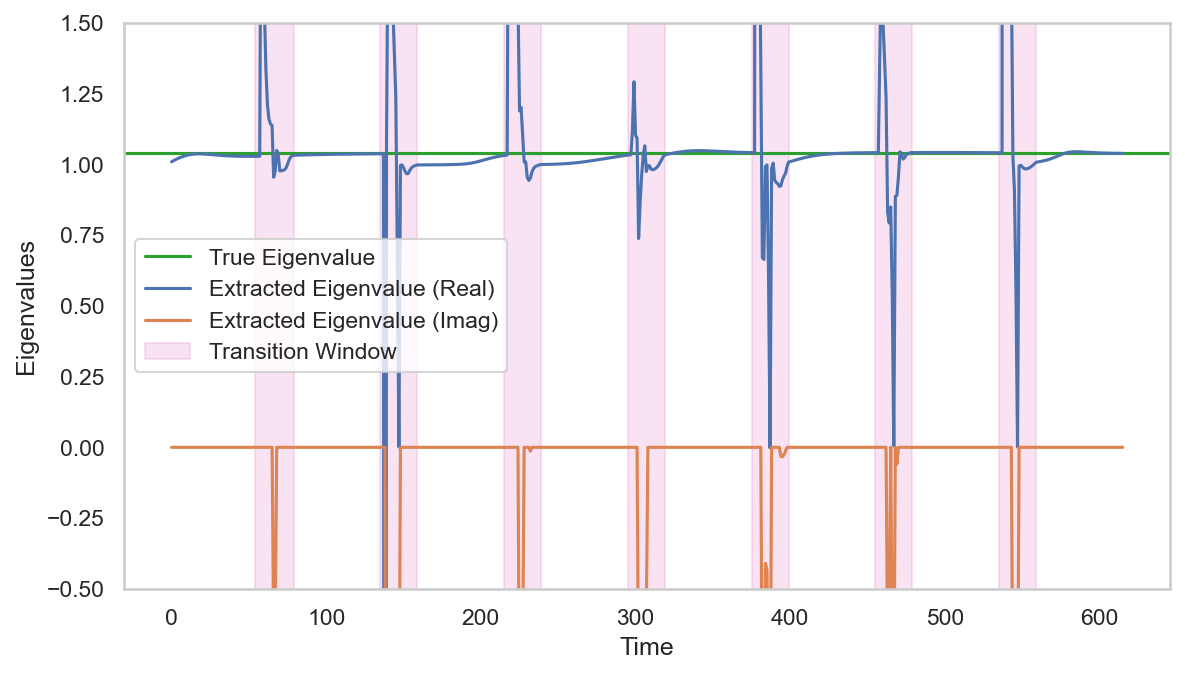

In [85]:
fig, ax = plt.subplots(1, 1)
ax.grid(False)
sns.set_style("whitegrid", {'axes.grid' : False})
fig.set_size_inches(9, 5)
# vlines = np.arange(window,0, len(time))
# ax.axvline(len(time)-window, color='r') 
ax.fill_between([len(time)*1-window-1-2,len(time)*1-2],-100, 100,alpha=0.2, label='Intermediate Region', color='tab:pink')
[ax.fill_between([len(time)*n-window-n-1,len(time)*n-n-1],-100, 100,alpha=0.2, color='tab:pink') for n in range(2,n_series)]
# [ax.axvline(len(time)*n+window-n-1, color='r') for n in range(0,n_series)]
# [ax.axvline(len(time)*n-n-1, color='g') for n in range(1,n_series)]

# [ax.axvline(n*window-dim, color='r') for n in range(1,n_series)]
ax.axhline(lams[0], color='tab:green', label='True Eigenvalue')
ax.plot(ws[:,0].real, label='Extracted Eigenvalue (Real)')
ax.plot(ws[:,0].imag, label='Extracted Eigenvalue (Imag)')
# ax.plot(ws[:,1])
ax.set_ylabel('Eigenvalues')
ax.set_xlabel('Time')
ax.set_ylim(-0.5,1.5)
plt.legend()
# ax2 = ax.twinx()
# ax2.plot(X_series,c='k')
plt.show()

In [ ]:
# wins = np.linspace(dim*2,len(X_series),16)
# figp, axsp = make_subplt_arr(len(wins))
# figt, axst = make_subplt_arr(len(wins))
# for i,w in enumerate(wins):
#     w = int(w)
#     P_series_win, theta_win = eig_companion_Cshift_time(X_series, dim, beta=beta, window_size=w)
#     norm_p = P_series_win/np.linalg.norm(P_series_win)
#     norm_t = theta_win / theta_win[-1]
#     axsp[i].set_xticks([])
#     axsp[i].set_yticks([])
#     axsp[i].plot(norm_p)
#     axsp[i].set_title(f'window={w}')

#     axst[i].plot(norm_t.real)
#     axst[i].set_title(f'window={w}')

# figt.set_size_inches(20, 12)
# figp.set_size_inches(20, 12)
# plt.legend()
# plt.show()

In [ ]:
plt.plot(theta_win.real / theta_win[-1].real, label='Window')
plt.plot(theta_nowin.real / theta_nowin[-1], label='No Window')

plt.title('Filters (REAL)')
plt.legend()
plt.show()

plt.plot(solve_scale_shift(P_series_nowin, P_series_win), label='No Window')
plt.plot(P_series_win, label='Window')
plt.title('P_series NOFIT')
plt.legend()
plt.show()



In [ ]:
fit_Y = Y_series[dim:]
fit_nowin = solve_scale_shift(P_series_nowin, fit_Y)
fit_win = solve_scale_shift(P_series_win, fit_Y)

plt.plot(fit_nowin, label='No Window')
plt.plot(fit_win, label='Window')
plt.plot(fit_Y, label='True')
plt.title('P_series')
plt.legend()
plt.show()
